> ### In this tutorial we will cover:
> - how we can visualize our structures in 3D
> - how we can highlight specific parts of molecules
> - how we can export visualizations
> - how we can visualize structures in 2D

When building a molecule we need to know which parts to connect to each other. This involves defining _linkages_ where we specify which atoms to connect to each other. How do we know what the atoms are called or what serial numbers they have? Unless we are working with pre-defined linkages and compounds that we trust, we usually don't! The solution is to look at the structure and get the info for ourselves. Also, what if we find the built structure to be a little "crammed" or have a clash somewhere. We can optimize the conformation and the best way to check that the optimization was successful is again to look at the result directly. There are many reasons for us to visually inspect structures. This is why biobuild molecules have two methods `show` and `draw` that will visualize the structures in 3D.  

### Plotting backends 

Biobuild uses `plotly` as backend to visualize structures. Plotly can handle large plots pretty well even in 3D but it may get overwhelmed if you overlay too many layers! Especially when overlaying different conformations plots can get really large really quickly - 50 conformations of a 200 atom molecule on top of each other is getting difficult to handle! As an alternative, biobuild also integrates `nglview` and `py3dmol` to visualize a molecular structure. In this case no further highlighting functionality is offered, however. There is a correspondignly named method in the Molecule class to open an nglview window instead of a plotly figure.

### `show` vs `draw`

The difference between the two is simple. They are identical, except that `show` calls `draw` and immediately opens the preview window without returning anything. On the other hand, `draw` returns a `MoleculeViewer3D` object that can be further used to modify the visualization before in turn calling its own `show` method to open the preview. In summary, when you only want to directly look at a molecule without highlighting anything, use `show` otherwise use `draw` and then do your highlighting.

### Example

Let us visualize and highlight parts in a larger molecule.

In [16]:
import biobuild as bb

mol = bb.molecule("files/x_wing.json")

# let's start with a barebone "show"
mol.show()

Next we can try figuring out what features are offered to "highlight" parts of molecules in the `MoleculeViewer3D` object. To do that we first `draw` the molecule and then use the returned viewer object to further highlight stuff. For a start, we could highlight some specific residues:

In [17]:
# get the viewer
viewer = mol.draw()

# highlight the two residues named TRZ in orange and red, respectively
viewer.highlight_residues(*mol.get_residues("TRZ"), bond_colors=["orange", "red"])

viewer.show()

Next we might want to highlight a specific atom neighborhood:

In [18]:
# get the atom with serial number 49
source_atom = mol.get_atom(49)
# get all neighboring atoms within 4 bonds of the source atom
neighbors = mol.get_neighbors(source_atom, 4) 

# highlight the source atom and its neighbors
viewer.draw_atom(source_atom, color="lightblue", id="source-atom")
viewer.draw_atoms(*neighbors, colors="purple")

viewer.show()

We can also more specifically use `draw_point` or `draw_vector` to draw in any point or edge we like, irrespective of them belonging to an existing atom or not. 

In [19]:
import numpy as np
from biobuild import structural

center = np.mean([i.coord for i in mol.get_atoms()], axis=0)

# let's draw in the overall center of mass of the entire molecule
viewer.draw_point("center-of-mass", center, color="limegreen")

# and now let's visualize the vectors marking the distance between the neighbors and the center of mass
for i in neighbors:
    dist = structural.distance_between(i.coord, center)
    viewer.draw_vector(
        f"{dist=}", i.coord, center, color="yellow", opacity=0.8, linewidth=1, showlegend=False, hoverinfo="name"
    )

viewer.show()

If we are happy with our slightly wild figure, we can export it to a stand-alone HTML file that we can save and share with others, using the `write_html` method. If we want to integrate the figure somewhere else such as a plottly-supporting web-app framework we can always get the underlying `plotly.Figure` object using the `figure` attribute of the `MoleculeViewer3D`. 

In [20]:
# save the figure to an html file
viewer.write_html("files/x_wing.html")

# get the plotly figure for other purposes
fig = viewer.figure

### Visualizing Graphs

If you have come across the optimization section, you definitely know that each Molecule can be represented by an `AtomGraph` or a `ResidueGraph`. Both graphs also support the same `show` and `draw` mechanisms, so visualizing them is no different than visualizing the molecule itself. For instance, we can visualize the residue graph representation of the molecule just like this:  

In [21]:
# get a residue graph
graph = mol.make_residue_graph()

# make a graph viewer
graph_viewer = graph.draw()

# highlight all bonds that are part of the TRZ residues
for residue in mol.get_residues("TRZ"):
    graph_viewer.draw_edges(*mol.get_bonds(residue), color="red", opacity=0.3, linewidth=2, showlegend=False)

graph_viewer.show()

### NglView

If you prefer NglView to the default plotly based figures, you can always call `nglview` instead of `show`. This is only supported for `Molecules`, however, and is not implemented for graphs. 

In [22]:
fig = mol.nglview()
fig

NGLWidget()

### 2D rendering

Biobuild does not by itself support a 2D visualization of molecules. However, because `rdkit` implements an excellent 2D visualization scheme 2D graphics of molecules can be easily created by simply first exporting to `rdkit`. We integrated a `chem2dview` method to molecules that will perform the necessary conversions automatically, and return a 2D image of the molecule. 

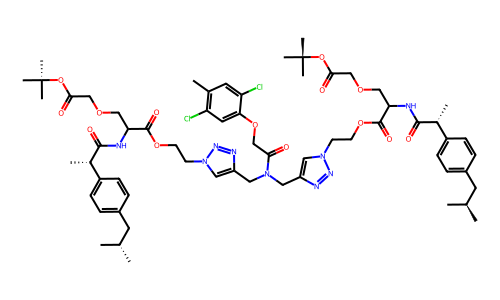

In [23]:
# only works if RDKit is installed
mol.chem2dview()